# Classification

**If you are a Colab user**

If you use Google Colab, you can uncomment the following cell to mount your Google Drive to Colab.
After that, Clab can read/write files and data in your Google Drive

please change the current directory to be the folder that you save your Notebook and
data folder. For example, I save my Colab files and data in the following location

In [1]:
#from google.colab import drive

#%cd /content/drive/MyDrive/Colab\ Notebooks

**scikit learn**

scikit learn is a machine learning package that provides convenient implementation of machine learning algorithms.

Using the installation command in the terminal (if your computer is a Linux system) or other command-line interpreter applications like Anaconda Prompt (if your computer is a Windows system):

*conda install scikit-learn*

If you would like to install it from this notebook, you uncomment the following cell and execute it.https://scikit-learn.org/stable/

In [2]:
#!pip3 install scikit-learn

**install imbalanced-learn**

Imbalanced-learn (imported as imblearn) is an open source, MIT-licensed library relying on scikit-learn (imported as sklearn) and provides tools when dealing with classification with imbalanced classes.
https://imbalanced-learn.org/stable/

Using the installation command in the terminal (if your computer is a Linux system) or other command-line interpreter application like Anaconda Prompt (if your computer is a Windows system):

*conda install -c conda-forge imbalanced-learn*

If you would like to install it from this notebook, you uncomment the following cell and execute it

In [3]:
#!pip3 install imbalanced-learn

**Set up standards for the remainder of the notebook**

In [4]:
## import libraries and tools ##

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn

import imblearn

import seaborn as sn

# to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

## The AI4I2020 Predictive Maintenance Dataset

AI4I2020 Preditive Maintenance Dataset

https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

The dataset consists of 10,000 data points stored as rows with 14 features in columns
<ol>
<li>UID: unique identifier ranging from 1 to 10,000 </il>

<li>product ID: consisting of a letter L, M, or H for low (50% of all products), medium (30%) and high (20%) as product quality variants and a variant-specific serial number</il>

<li> Type: a letter L, M, or H

<li>air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K</il>

<li>process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.</il>

<li>rotational speed [rpm]: calculated from a power of 2860 W, overlaid with a normally distributed noise.</il>

<li>torque [Nm]: torque values are normally distributed around 40 Nm with a Ïƒ = 10 Nm and no negative values.</il>

<li>tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a 'machine failure' label that indicates, whether the machine has failed in this particular datapoint for any of the following failure modes are true.
</ol>

The machine failure consists of five independent failure modes:
<ol>
<li>tool wear failure (TWF): the tool will be replaced of fail at a randomly selected tool wear time between 200 â€“ 240 mins (120 times in our dataset). At this point in time, the tool is replaced 69 times, and fails 51 times (randomly assigned).</il>

<li>heat dissipation failure (HDF): heat dissipation causes a process failure, if the difference between air- and process temperature is below 8.6 K and the toolâ€™s rotational speed is below 1380 rpm. This is the case for 115 data points.</il>

<li>power failure (PWF): the product of torque and rotational speed (in rad/s) equals the power required for the process. If this power is below 3500 W or above 9000 W, the process fails, which is the case 95 times in our dataset.</il>

<li>overstrain failure (OSF): if the product of tool wear and torque exceeds 11,000 minNm for the L product variant (12,000 M, 13,000 H), the process fails due to overstrain. This is true for 98 datapoints.</il>

<li>random failures (RNF): each process has a chance of 0,1 % to fail regardless of its process parameters. This is the case for only 5 datapoints, less than could be expected for 10,000 datapoints in our dataset.
</ol>

If at least one of the above failure modes is true, the process fails and the 'machine failure' label is set to 1. It is therefore not transparent to the machine learning method, which of the failure modes has caused the process to fail

### Load and understand data

In [19]:
## read the dataset in csv format ##

df = pd.read_csv('Data/ai4i2020.csv')
df.head(10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,0,0,0,0,0
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,0,0,0,0,0
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,0,0,0,0,0
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,0,0,0,0,0
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,0,0,0,0,0


In [20]:
# check the variable names, data type, and data size

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [21]:
# change the integer data type of numerical features to float data type
df['Tool wear [min]'] = df['Tool wear [min]'].astype('float64')
df['Rotational speed [rpm]'] = df['Rotational speed [rpm]'].astype('float64')

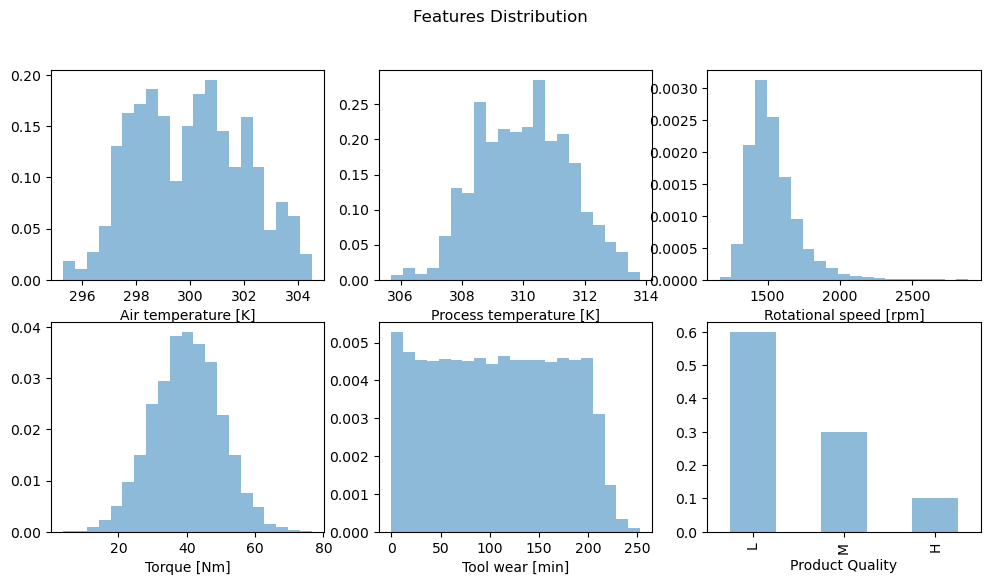

In [22]:
# visually check features

features = df.iloc[:,2:8] # features that are rows 2-7 in the original dataset. There are six features in total
num_features = features.iloc[:,1:6] # among the six features, columns 1-5 are numerical features, and column 0 is a categorical feature

# Histograms of numeric features
fig, axs = plt.subplots(nrows=2, 
                        ncols=3, 
                        figsize=(12,6))
fig.suptitle('Features Distribution')
for j, feature in enumerate(num_features):
    row = j//3
    col = j-j//3*3
    axs[row,col].hist(num_features[feature],
                      bins=21,
                      alpha=0.5,
                      density=True)
    axs[row,col].set_xlabel(feature)

# column chart of the categorical feature
type_count = features.Type.value_counts(normalize=True)
type_count.plot(kind='bar',alpha=0.5)
plt.xlabel('Product Quality')

plt.show();


In [23]:
# review the two target variables, Machine failure and Failure type (recoded from the five dummy variables of failure types)

# create a new column to save categories of failure mode: 0: no failure, 1: TWF, 2: HDF, 3: PWF, 4: OSF, 5: RNF
# this new column meets the desired data format for sklean
target = df.iloc[:,8:14]
target['Failure mode']=0 # default value is '0', meaning no failure
for i in range(1,6):
    target.loc[(target.iloc[:,i]==1),'Failure mode']=i # 'Failure mode'=i if the ith failure type ==1

# check the relationship between `Machine failure' and 'Failure mode'
pd.crosstab(target['Machine failure'],
            target['Failure mode'], 
            values=target['Failure mode'], 
            aggfunc='count')

# Add a column to the dataset, saving the derived failure mode
df['Failure mode']=target['Failure mode']
# There are 9 observations that have machine failure but no failure mode has been specified.
# There are 18 observations that have no machine failure but the failure modee is RNF.
# There is only 1 observation of machine failure whose failure mode is RNF.
# In total, 28 observations seem to provide no useful information for this study, which can be excluded

Failure mode,0,1,2,3,4,5
Machine failure,,,,,,
0,9643.0,NaN,NaN,NaN,NaN,18.0
1,9.0,42.0,106.0,83.0,98.0,1.0


### Pre-process data

A few data pre-processing is required here, including filtering out outliers and balancing data

#### Data filtering

In [24]:
# We exclude these 28 observations 
obs_excluded = (target['Machine failure']==1)&(target['Failure mode']==0) | (target['Failure mode']==5)
df_proc = df[~obs_excluded]
df_proc

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure mode
0,1,M14860,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604.0,29.5,14.0,0,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632.0,31.8,17.0,0,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645.0,33.4,22.0,0,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408.0,48.5,25.0,0,0,0,0,0,0,0


In [25]:
# We exclude these 28 observations 
obs_excluded = (target['Machine failure']==1)&(target['Failure mode']==0) | (target['Failure mode']==5)
df_proc = df[~obs_excluded]

# drop columns that won't be used by this study
df_proc = df_proc.drop(columns=['UDI','Product ID','TWF','HDF','PWF','OSF','RNF'])

# check the updated dataset
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9972 non-null   object 
 1   Air temperature [K]      9972 non-null   float64
 2   Process temperature [K]  9972 non-null   float64
 3   Rotational speed [rpm]   9972 non-null   float64
 4   Torque [Nm]              9972 non-null   float64
 5   Tool wear [min]          9972 non-null   float64
 6   Machine failure          9972 non-null   int64  
 7   Failure mode             9972 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 701.2+ KB


#### Data rebalancing

In [26]:
# Let's check the distribution of Failure mode in the dataset
print('Sample size by class:')
df_proc['Failure mode'].value_counts().sort_index()
# failure samples counts 3.3%. the dataset is highly unbalanced. 

# we resample data to address the class-inbalanced dataset using
# Synthetic Minority Over-sampling Technique for Nominal and Continuous (SMOTNC).
# We keep the ratio of non-failure to failure as 80:20
# We note that imblearn is not the best solution. But let's use it temporarily
from imblearn.over_sampling import SMOTENC

n_neg = (df_proc['Failure mode']==0).sum() # the sample size for class 0 of 'Failure mode'
n_pcs = round((round(n_neg/0.8)-n_neg)/4)  #sample size for each of clases 1~4 of 'Failure mode'

# Define the target sample distribution
balance_cause = {0:n_neg,
                 1:n_pcs,
                 2:n_pcs,
                 3:n_pcs,
                 4:n_pcs}

# define 
sm = SMOTENC(categorical_features=[0,6,7], # specify columns that are categorical variables
             sampling_strategy=balance_cause,  
             random_state=0)

df_resmp, y_resmp = sm.fit_resample(df_proc, 
                                    df_proc['Failure mode']) # sampling from df_proc according to the distribution of column 'Failure mode'


print('\nSample size by class - after resampling:')
print(y_resmp.value_counts().sort_index())

Sample size by class:


Failure mode
0    9643
1      42
2     106
3      83
4      98
Name: count, dtype: int64


Sample size by class - after resampling:
Failure mode
0    9643
1     603
2     603
3     603
4     603
Name: count, dtype: int64


#### one-hot encoding of the categorical feature

In [27]:
# recode the categorical variable "Type" as dummy variables:
df_encoded = pd.get_dummies(df_resmp, 
                            columns=['Type'], 
                            drop_first=False,
                            dtype=int)  # drop_first=True avoids dummy trap

# move the dummies in front of the response variables
df_encoded = df_encoded.iloc[:,[0,1,2,3,4,7,8,9,5,6]]
df_encoded.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Machine failure,Failure mode
0,298.1,308.6,1551.0,42.8,0.0,0,0,1,0,0
1,298.2,308.7,1408.0,46.3,3.0,0,1,0,0,0
2,298.1,308.5,1498.0,49.4,5.0,0,1,0,0,0
3,298.2,308.6,1433.0,39.5,7.0,0,1,0,0,0
4,298.2,308.7,1408.0,40.0,9.0,0,1,0,0,0


#### data normalization

In [28]:
# we normalize the quantitative features
from sklearn.preprocessing import StandardScaler, MinMaxScaler

data=df_encoded.copy()
data.iloc[:,range(5)] = StandardScaler().fit_transform(df_encoded.iloc[:,range(5)])
data.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Machine failure,Failure mode
0,-1.025952,-1.010064,0.058626,0.126409,-1.726651,0,0,1,0,0
1,-0.975594,-0.940508,-0.562419,0.422584,-1.682043,0,1,0,0,0
2,-1.025952,-1.079621,-0.171552,0.684911,-1.652304,0,1,0,0,0
3,-0.975594,-1.010064,-0.453845,-0.152842,-1.622565,0,1,0,0,0
4,-0.975594,-0.940508,-0.562419,-0.110532,-1.592827,0,1,0,0,0


#### Train-validation-test split

In [29]:
# train (80%)-validation (10%)-test (10%) split

rd_state = 0

# 80% for train and 20% for val and test
from sklearn.model_selection import train_test_split
X, Y = data.iloc[:,range(0,8)], data.iloc[:,-2:]
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, 
                                                            Y, 
                                                            test_size=0.2, 
                                                            stratify=Y['Failure mode'], 
                                                            random_state=rd_state)
# 20% is equally split into val and test
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, 
                                                Y_val_test, 
                                                test_size=0.5, 
                                                stratify=Y_val_test['Failure mode'], 
                                                random_state=rd_state)

Y_train_F = Y_train['Machine failure']
Y_val_F = Y_val['Machine failure']
Y_test_F = Y_test['Machine failure']

Y_train_T = Y_train['Failure mode']
Y_val_T = Y_val['Failure mode']
Y_test_T = Y_test['Failure mode']


## Binary Classification

Features:
<ol>
 <li>   Air temperature [K]      float64</il>
 <li>   Process temperature [K]  float64</il>
 <li>   Rotational speed [rpm]   float64</il>
 <li>   Torque [Nm]              float64</il>
 <li>   Tool wear [min]          float64</il>
 <li>   Type_L                   int64</li>
 <li>   Type_M                   int64</li>
 <li>   Type_H                   int64</li>
</ol>



Response:
<ol>
<li> Machine failure          int64</il>
</ol>

### Logistic Regression

LogisticRegression in Scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Report on the test dataset:
               precision    recall  f1-score   support

      Normal       0.90      0.96      0.93       965
     Failure       0.81      0.59      0.68       241

    accuracy                           0.89      1206
   macro avg       0.86      0.78      0.81      1206
weighted avg       0.89      0.89      0.88      1206



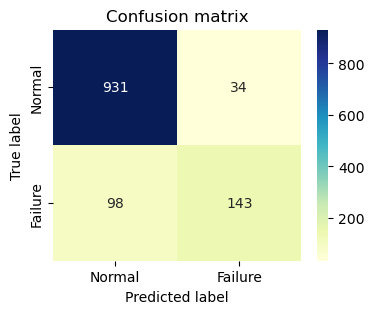

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# fit model
lgr=LogisticRegression()
lgr_model = lgr.fit(X_train,Y_train_F)
Y_test_F_pred = lgr_model.predict(X_test)

# evaluation
test_report = classification_report(Y_test_F,Y_test_F_pred,target_names = ['Normal','Failure'])
print(f'Report on the test dataset:\n {test_report}')

# confusion matrix
cm = confusion_matrix(Y_test_F,Y_test_F_pred)
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g', xticklabels=['Normal','Failure'], yticklabels=['Normal','Failure'])
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

### Linear Discriminant Analysis (LDA)

LinearDiscriminantAnalysis in Scikit-learn

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

Report on the test dataset:
               precision    recall  f1-score   support

      Normal       0.91      0.96      0.93       965
     Failure       0.81      0.60      0.69       241

    accuracy                           0.89      1206
   macro avg       0.86      0.78      0.81      1206
weighted avg       0.89      0.89      0.88      1206



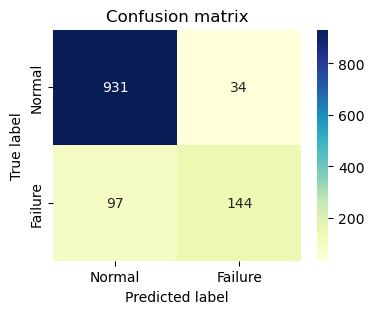

In [17]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# fit model
lda=LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,Y_train_F)
Y_test_F_pred = lda_model.predict(X_test)

# evaluation
test_report = classification_report(Y_test_F,Y_test_F_pred,target_names = ['Normal','Failure'])
print(f'Report on the test dataset:\n {test_report}')

# confusion matrix
cm = confusion_matrix(Y_test_F,Y_test_F_pred)
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g', xticklabels=['Normal','Failure'], yticklabels=['Normal','Failure'])
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

In [18]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# model fitting and tuning
qda=QuadraticDiscriminantAnalysis()

qda_params = {'reg_param':[0.0,0.1,0.5]}

qda_model=fit_tune(qda,
               X_train,
               Y_train,
               qda_params,
               'binary')

# model evaluation on the validation set
cm, scores = eval_pred(qda_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

NameError: name 'fit_tune' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# model fitting and tuning
dtc = DecisionTreeClassifier()

dtc_params = {'criterion':['gini','entropy','log_loss'],
              'splitter':['best','random'],
              'class_weight':[{0:1,1:1},{0:1,1:2}],
              'max_features':[None,'sqrt', 'log2', 4],  
              'random_state':[0]}

dtc_model=fit_tune(dtc,
               X_train,
               Y_train,
               dtc_params,
               'binary')


# model evaluation on the validation set
cm, scores = eval_pred(dtc_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

from sklearn import tree
#dtc.fit(X_train,Y_train['Machine failure''])
tree.plot_tree(DecisionTreeClassifier(random_state=0).fit(X_train,Y_train['Machine failure']),
               max_depth=2)

In [ ]:
from sklearn.ensemble import BaggingClassifier

# model fitting and tuning
bgc = BaggingClassifier()

bgc_params ={'n_estimators':[10,20,50,100],
             'random_state':[0]}

bgc_model = fit_tune(bgc,
                 X_train,
                 Y_train,
                 bgc_params,
                 'binary')

# model evaluation on the validation set
cm, scores = eval_pred(bgc_model,
                       X_val,
                       Y_val,
                       task='binary',
                       disp=True)

## Multiclass Classification

Features:
<ol>
 <li>   Air temperature [K]      float64</il>
 <li>   Process temperature [K]  float64</il>
 <li>   Rotational speed [rpm]   float64</il>
 <li>   Torque [Nm]              float64</il>
 <li>   Tool wear [min]          float64</il>
 <li>   Type_L                   int64</li>
 <li>   Type_M                   int64</li>
 <li>   Type_H                   int64</li>
</ol>



Response:
<ol>
<li> Failure mode          int64</il>
</ol>

### Multinomial Logistic regression

In [ ]:
#from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

# fit model
mlr=LogisticRegression()
mlr_model =mlr.fit(X_train,Y_train_T)
Y_test_T_pred = mlr_model.predict(X_test)

# evaluation
test_report = classification_report(Y_test_T,Y_test_T_pred,target_names = ['Normal','TWF','HDF','PWF','DSF'])
print(f'Report on the test dataset:\n {test_report}')

# confusion matrix
cm = confusion_matrix(Y_test_T,Y_test_T_pred)
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g', 
            xticklabels=['Normal','TWF','HDF','PWF','DSF'], 
            yticklabels=['Normal','TWF','HDF','PWF','DSF'])
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.metrics import classification_report, confusion_matrix

# fit model
dtr=DecisionTreeClassifier()
dtr_model =dtr.fit(X_train,Y_train_T)
Y_test_T_pred = dtr_model.predict(X_test)

# evaluation
test_report = classification_report(Y_test_T,Y_test_T_pred,target_names = ['Normal','TWF','HDF','PWF','DSF'])
print(f'Report on the test dataset:\n {test_report}')

# confusion matrix
cm = confusion_matrix(Y_test_T,Y_test_T_pred)
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu",fmt='g', 
            xticklabels=['Normal','TWF','HDF','PWF','DSF'], 
            yticklabels=['Normal','TWF','HDF','PWF','DSF'])
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show();